<a href="https://colab.research.google.com/github/hamednasr/TensorFlow-Projects/blob/main/body_move_recognition_for_game(mediapipe_abdomen)_15fps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Body Movement Recognition

First of all, I gathered data via camera. The video clips each has set to capture 15 frames for each movement. Coordinates of the body were gathered. I recorded four types of body movements (right, left, jump, crouch) as training data. There were 100 piece of video for each movement (total of 400 video clips). I captured the body coordinations and created a CNN-LSTM Deep learning model with tensorflow and mediapipe . Then trained the model with 400 video clips. The output model was very robust and efficient in classification of body movements with test accuracy of 98%. This model was ordered by Mars game studio. 

In [ ]:
pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 32.9 MB 186 kB/s 


In [ ]:
import tensorflow as tf
import numpy as np
import mediapipe as mp
from matplotlib import pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')
import cv2
import os
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

C:\Users\hmdna\AppData\Local\Temp\ipykernel_13416\3869536394.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [ ]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [ ]:
def mediapipe_detection(image,model):
    results = model.process(image)
    return image, results

In [ ]:
# 11: left_shoulder
# 12: right_shoulder
# 23: left_hip
# 24: right_hip
abdomen_connections = ((11,12),(23,24),(11,23),(12,24))

In [ ]:
def draw_abdomen_landmarks(img,results):

    mp_drawing.draw_landmarks(img, 
                            results.pose_landmarks,
                            abdomen_connections,
                            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=1, circle_radius=0),
                            connection_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2))
  

In [ ]:
cap = cv2.VideoCapture(0)

#initiate holistic model:
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()

        frame, results = mediapipe_detection(frame,holistic)

        draw_abdomen_landmarks(frame,results)
        
        cv2.imshow('Webcam Feed', frame)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

In [ ]:
img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
type(results.pose_landmarks)

mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList

In [ ]:
len(results.pose_landmarks.landmark)

33

In [ ]:
results.pose_landmarks

landmark {
  x: 0.2963802
  y: 0.17960198
  z: -0.96730804
  visibility: 0.9955002
}
landmark {
  x: 0.29128003
  y: 0.12156619
  z: -0.92643356
  visibility: 0.99337274
}
landmark {
  x: 0.2945406
  y: 0.12155226
  z: -0.92658216
  visibility: 0.9932982
}
landmark {
  x: 0.29662764
  y: 0.12087137
  z: -0.9271431
  visibility: 0.9910687
}
landmark {
  x: 0.2687113
  y: 0.11835237
  z: -1.0247139
  visibility: 0.99498093
}
landmark {
  x: 0.25533795
  y: 0.11447575
  z: -1.0251346
  visibility: 0.9954348
}
landmark {
  x: 0.24084511
  y: 0.11195073
  z: -1.0255781
  visibility: 0.99392503
}
landmark {
  x: 0.2518012
  y: 0.13207798
  z: -0.6312796
  visibility: 0.99427766
}
landmark {
  x: 0.18448886
  y: 0.12044091
  z: -1.0759981
  visibility: 0.9967786
}
landmark {
  x: 0.27284756
  y: 0.23746867
  z: -0.842497
  visibility: 0.99549276
}
landmark {
  x: 0.24887197
  y: 0.23676838
  z: -0.9703867
  visibility: 0.9979105
}
landmark {
  x: 0.20367387
  y: 0.37592706
  z: -0.24645527
  

In [ ]:
results.pose_landmarks.landmark[11], results.pose_landmarks.landmark[12]

(x: 0.20367387
 y: 0.37592706
 z: -0.24645527
 visibility: 0.9931852,
 x: -0.0034174812
 y: 0.36276314
 z: -1.0130101
 visibility: 0.9957778)

In [ ]:
results.pose_landmarks.landmark[23], results.pose_landmarks.landmark[24]

(x: 0.14574091
 y: 1.0922993
 z: 0.22149713
 visibility: 0.20070012,
 x: -0.014867142
 y: 1.1406726
 z: -0.22080381
 visibility: 0.195306)

In [ ]:
def abdomen_keypoints(results):
    if results.pose_landmarks:
        abdomen=[]
        for i in [11,12,23,24]:
            abdomen.append(results.pose_landmarks.landmark[i])
        keypoints = np.array([[r.x, r.y, r.z] for r in abdomen]).flatten()
    else:
        keypoints = np.zeros(3*4)
    
    return keypoints

# data record:

## jump:

In [ ]:
data_path = 'bodymove_data_abd_15fps'
no_videos = 100
sequences_length = 15

In [ ]:
for video in range(no_videos):
    try:
        os.makedirs(os.path.join(data_path,'jump',str(video)))  
    except:
        pass   

In [ ]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.4,min_tracking_confidence=0.4) as holistic:

    for video in range(no_videos):

        ret, frame = cap.read()
        cv2.putText(frame,'COLLECTION START for JUMP',(100,200),
                    cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),4,cv2.LINE_AA)
        cv2.putText(frame,f'collecting frames for jump video numer {video}',(15,12),
                    cv2.FONT_HERSHEY_COMPLEX,.5,(0,255,0),1,cv2.LINE_AA)
        cv2.imshow('Webcam Feed', frame)
        cv2.waitKey(2000)

        for frame_num in range(sequences_length):            
            ret, frame = cap.read()

            image, results = mediapipe_detection(frame,holistic)

            draw_abdomen_landmarks(image,results)        

            keypoints = abdomen_keypoints(results)
#             print(keypoints)

            cv2.putText(image,f'collecting frames for jump video numer {video}',(15,12),
            cv2.FONT_HERSHEY_COMPLEX,0.5,(0,255,0),1,cv2.LINE_AA)
            cv2.imshow('Webcam Feed', image)

            npy_path = os.path.join(data_path,'jump',str(video),str(frame_num))
            np.save(npy_path,keypoints)
            cv2.waitKey(1)

        if cv2.waitKey(500) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

## crouch:

In [ ]:
data_path = 'bodymove_data_abd_15fps'
no_videos = 100
sequences_length = 15

In [ ]:
for video in range(no_videos):
    try:
        os.makedirs(os.path.join(data_path,'crouch',str(video)))  
    except:
        pass   

In [ ]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.4,min_tracking_confidence=0.4) as holistic:

    for video in range(no_videos):

        ret, frame = cap.read()
        cv2.putText(frame,'COLLECTION START for CROUCH',(100,200),
                    cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),4,cv2.LINE_AA)
        cv2.putText(frame,f'collecting frames for crouch video numer {video}',(15,12),
                    cv2.FONT_HERSHEY_COMPLEX,.5,(0,255,0),1,cv2.LINE_AA)
        cv2.imshow('Webcam Feed', frame)
        cv2.waitKey(2000)

        for frame_num in range(sequences_length):            
            ret, frame = cap.read()

            image, results = mediapipe_detection(frame,holistic)

            draw_abdomen_landmarks(image,results)        

            keypoints = abdomen_keypoints(results)
#             print(keypoints)

            cv2.putText(image,f'collecting frames for crouch video numer {video}',(15,12),
            cv2.FONT_HERSHEY_COMPLEX,0.5,(0,255,0),1,cv2.LINE_AA)
            cv2.imshow('Webcam Feed', image)

            npy_path = os.path.join(data_path,'crouch',str(video),str(frame_num))
            np.save(npy_path,keypoints)
            cv2.waitKey(1)

        if cv2.waitKey(500) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

## right:

In [ ]:
data_path = 'bodymove_data_abd_15fps'
no_videos = 100
sequences_length = 15

In [ ]:
for video in range(no_videos):
    try:
        os.makedirs(os.path.join(data_path,'right',str(video)))  
    except:
        pass   

In [ ]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.4,min_tracking_confidence=0.4) as holistic:

    for video in range(no_videos):

        ret, frame = cap.read()
        cv2.putText(frame,'COLLECTION START for right',(100,200),
                    cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),4,cv2.LINE_AA)
        cv2.putText(frame,f'collecting frames for right video numer {video}',(15,12),
                    cv2.FONT_HERSHEY_COMPLEX,.5,(0,255,0),1,cv2.LINE_AA)
        cv2.imshow('Webcam Feed', frame)
        cv2.waitKey(2000)

        for frame_num in range(sequences_length):            
            ret, frame = cap.read()

            image, results = mediapipe_detection(frame,holistic)

            draw_abdomen_landmarks(image,results)        

            keypoints = abdomen_keypoints(results)
#             print(keypoints)

            cv2.putText(image,f'collecting frames for right video numer {video}',(15,12),
            cv2.FONT_HERSHEY_COMPLEX,0.5,(0,255,0),1,cv2.LINE_AA)
            cv2.imshow('Webcam Feed', image)

            npy_path = os.path.join(data_path,'right',str(video),str(frame_num))
            np.save(npy_path,keypoints)
            cv2.waitKey(1)

        if cv2.waitKey(500) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

## left:

In [ ]:
data_path = 'bodymove_data_abd_15fps'
no_videos = 100
sequences_length = 15

In [ ]:
for video in range(no_videos):
    try:
        os.makedirs(os.path.join(data_path,'left',str(video)))  
    except:
        pass   

In [ ]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.4,min_tracking_confidence=0.4) as holistic:

    for video in range(no_videos):

        ret, frame = cap.read()
        cv2.putText(frame,'COLLECTION START for left',(100,200),
                    cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),4,cv2.LINE_AA)
        cv2.putText(frame,f'collecting frames for left video numer {video}',(15,12),
                    cv2.FONT_HERSHEY_COMPLEX,.5,(0,255,0),1,cv2.LINE_AA)
        cv2.imshow('Webcam Feed', frame)
        cv2.waitKey(2000)

        for frame_num in range(sequences_length):            
            ret, frame = cap.read()

            image, results = mediapipe_detection(frame,holistic)

            draw_abdomen_landmarks(image,results)        

            keypoints = abdomen_keypoints(results)
#             print(keypoints)

            cv2.putText(image,f'collecting frames for left video numer {video}',(15,12),
            cv2.FONT_HERSHEY_COMPLEX,0.5,(0,255,0),1,cv2.LINE_AA)
            cv2.imshow('Webcam Feed', image)

            npy_path = os.path.join(data_path,'left',str(video),str(frame_num))
            np.save(npy_path,keypoints)
            cv2.waitKey(1)

        if cv2.waitKey(500) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

# preprocess data, create labels and train, test split:

In [ ]:
data_path = 'bodymove_data_abd_15fps'
no_videos = 100
sequences_length = 15

actions = np.array(['jump','crouch','right','left'])
actions

array(['jump', 'crouch', 'right', 'left'], dtype='<U6')

In [ ]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'jump': 0, 'crouch': 1, 'right': 2, 'left': 3}

In [ ]:
sequences = []
labels = []

for action in actions:
  for video in range(no_videos):
    window = []
    for frame_num in range(sequences_length):
      res = np.load(os.path.join(data_path,action,str(video),f'{frame_num}.npy'))
#       print(res)
      window.append(np.delete(res, [3,7,11,15]))
#       window.append(res)
      
    sequences.append(window)
    labels.append(label_map[action])

In [ ]:
print(np.array(window).shape)
print(np.array(sequences).shape)
print(np.array(labels).shape)

(15, 12)
(400, 15, 12)
(400,)


In [ ]:
X = np.array(sequences)
y = np.array(labels)

In [ ]:
X.shape

(400, 15, 12)

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape, X_test.shape

((320, 15, 12), (80, 15, 12))

In [ ]:
X_train.shape, X_test.shape

((320, 15, 12), (80, 15, 12))

# create and train deep learning model:

## create DL model:

In [ ]:
tensorboard=tf.keras.callbacks.TensorBoard(log_dir='logs')

In [ ]:
model = tf.keras.models.Sequential([
                    tf.keras.layers.LSTM(128,activation='relu', return_sequences=True,input_shape=(15,12)),
#                     tf.keras.layers.LSTM(64,activation='relu', return_sequences=True),
                    tf.keras.layers.LSTM(64,activation='relu', return_sequences=False),
#                     tf.keras.layers.LSTM(64,activation='relu', return_sequences=False),
#                     tf.keras.layers.Dense(64,activation='relu'),
                    tf.keras.layers.Dense(32,activation='relu'),
                    tf.keras.layers.Dense(actions.shape[0],activation='softmax')
                    ])

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(), 
              loss = 'sparse_categorical_crossentropy', 
              metrics='accuracy' )

In [ ]:
model.build()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 15, 128)           72192     
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 4)                 132       
                                                                 
Total params: 123,812
Trainable params: 123,812
Non-trainable params: 0
_________________________________________________________________


## train DL model:

In [ ]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
10/10 [==============================] - 3s 29ms/step - loss: 1.3859 - accuracy: 0.2469
Epoch 2/100
10/10 [==============================] - 0s 29ms/step - loss: 1.3800 - accuracy: 0.3219
Epoch 3/100
10/10 [==============================] - 0s 30ms/step - loss: 1.3726 - accuracy: 0.2969
Epoch 4/100
10/10 [==============================] - 0s 28ms/step - loss: 1.3500 - accuracy: 0.3938
Epoch 5/100
10/10 [==============================] - 0s 27ms/step - loss: 1.2564 - accuracy: 0.5000
Epoch 6/100
10/10 [==============================] - 0s 33ms/step - loss: 1.2047 - accuracy: 0.5219
Epoch 7/100
10/10 [==============================] - 0s 36ms/step - loss: 1.0510 - accuracy: 0.5688
Epoch 8/100
10/10 [==============================] - 0s 36ms/step - loss: 1.0490 - accuracy: 0.6219
Epoch 9/100
10/10 [==============================] - 0s 36ms/step - loss: 0.8463 - accuracy: 0.6875
Epoch 10/100
10/10 [==============================] - 0s 40ms/step - loss: 0.6862 - accuracy: 0.7750

10/10 [==============================] - 0s 30ms/step - loss: 1.0627e-04 - accuracy: 1.0000
Epoch 81/100
10/10 [==============================] - 0s 29ms/step - loss: 1.0222e-04 - accuracy: 1.0000
Epoch 82/100
10/10 [==============================] - 0s 26ms/step - loss: 9.9822e-05 - accuracy: 1.0000
Epoch 83/100
10/10 [==============================] - 0s 28ms/step - loss: 9.5981e-05 - accuracy: 1.0000
Epoch 84/100
10/10 [==============================] - 0s 22ms/step - loss: 9.2527e-05 - accuracy: 1.0000
Epoch 85/100
10/10 [==============================] - 0s 31ms/step - loss: 8.8716e-05 - accuracy: 1.0000
Epoch 86/100
10/10 [==============================] - 0s 25ms/step - loss: 8.6636e-05 - accuracy: 1.0000
Epoch 87/100
10/10 [==============================] - 0s 29ms/step - loss: 8.2406e-05 - accuracy: 1.0000
Epoch 88/100
10/10 [==============================] - 0s 23ms/step - loss: 8.0068e-05 - accuracy: 1.0000
Epoch 89/100
10/10 [==============================] - 0s 26ms/step -

In [ ]:
model.evaluate(X_test,y_test)

3/3 [==============================] - 1s 12ms/step - loss: 0.0496 - accuracy: 0.9875


[0.04960135370492935, 0.987500011920929]

In [ ]:
y_pred = np.argmax(model.predict(X_test),axis=1)
y_pred

3/3 [==============================] - 1s 128ms/step


array([1, 3, 3, 3, 2, 2, 2, 3, 1, 0, 3, 0, 1, 1, 2, 1, 2, 3, 1, 3, 1, 1,
       0, 2, 1, 3, 2, 3, 1, 2, 0, 3, 2, 3, 2, 3, 3, 1, 3, 0, 0, 3, 3, 3,
       2, 2, 0, 1, 1, 3, 3, 0, 2, 1, 2, 2, 2, 0, 0, 1, 1, 3, 1, 1, 3, 2,
       0, 0, 1, 3, 3, 1, 3, 0, 1, 1, 0, 3, 3, 3], dtype=int64)

In [ ]:
y_test

array([1, 3, 3, 3, 2, 2, 2, 3, 1, 0, 3, 0, 1, 1, 2, 1, 2, 3, 1, 3, 1, 1,
       0, 2, 1, 3, 2, 3, 1, 2, 0, 3, 2, 3, 2, 3, 3, 1, 3, 0, 3, 3, 3, 3,
       2, 2, 0, 1, 1, 3, 3, 0, 2, 1, 2, 2, 2, 0, 0, 1, 1, 3, 1, 1, 3, 2,
       0, 0, 1, 3, 3, 1, 3, 0, 1, 1, 0, 3, 3, 3])

In [ ]:
model.save('gameaction_mp_abd_15fps.h5')

In [ ]:
model.load_weights('gameaction_mp_abd_15fps.h5')  

## evaluate DL model:

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[13,  0,  0,  0],
       [ 0, 22,  0,  0],
       [ 0,  0, 17,  0],
       [ 1,  0,  0, 27]], dtype=int64)

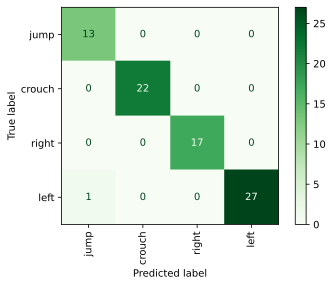

In [ ]:
disp = ConfusionMatrixDisplay(cm , display_labels= actions)

disp.plot(cmap='Greens' , xticks_rotation='vertical');

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        17
           3       1.00      0.96      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



# test a video sample:

In [ ]:
no_videos = 10
sequences_length = 15

In [ ]:
# cap = cv2.VideoCapture(0)

# with mp_holistic.Holistic(min_detection_confidence=0.4,min_tracking_confidence=0.4) as holistic:
    
#     videos=[]
#     for video in range(no_videos):
        
#         window = []
#         for frame_num in range(sequences_length):

#             ret, frame = cap.read()

#             image, results = mediapipe_detection(frame,holistic)

#             draw_abdomen_landmarks(image,results)        

#             keypoints = abdomen_keypoints(results)
# #             print(keypoints)
#             if frame_num==0:
#                 cv2.putText(image,'COLLECTION START',(150,200),
#                             cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),4,cv2.LINE_AA)
#                 cv2.putText(image,f'collecting frames for left_jump video numer {video}',(15,12),
#                             cv2.FONT_HERSHEY_COMPLEX,.5,(0,255,0),1,cv2.LINE_AA)
#                 cv2.imshow('Webcam Feed', image)
#                 cv2.waitKey(2000)

#             else:
#                 cv2.putText(image,f'collecting frames for left_jump video numer {video}',(15,12),
#                 cv2.FONT_HERSHEY_COMPLEX,0.5,(0,255,0),1,cv2.LINE_AA)
#                 cv2.waitKey(130)
#                 cv2.imshow('Webcam Feed', image)

#             window.append(keypoints)
        
#         videos.append(window)
#         if cv2.waitKey(20) & 0xFF == ord('q'):
#             break
    
#     inputv = np.array(videos)
#     print(inputv.shape)
#     pred = model.predict(inputv)
#     print(pred)
#     action = actions[np.argmax(pred,axis=1)]
#     print(action)

#     if np.max(pred)> threshold:

#         ret, frame = cap.read()
#         cv2.rectangle(frame,(0,0),(250,50),(245,117,16),-1)
#         cv2.putText(frame, f'{action[0]}:{np.max(pred)}',
#                           (3,30),cv2.FONT_HERSHEY_SIMPLEX,1.5,
#                           (255,255,255),2,cv2.LINE_AA)
#         cv2.imshow('Webcam Feed', frame)
#         cv2.waitKey(2000)

# #     if cv2.waitKey(10) & 0xFF == ord('q'):
# #         break

# cap.release()
# cv2.destroyAllWindows()

In [ ]:
# L, R, J, L, R, C, C, J, R, R,

In [ ]:
threshold = 0.3

cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.4,min_tracking_confidence=0.4) as holistic:

    while cap.isOpened():
        
        ret, frame = cap.read()
        
        cv2.putText(frame,'Recording in 2 Seconds...ready?',(20,30),
                    cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),4,cv2.LINE_AA)
        cv2.imshow('Webcam Feed', frame)
        cv2.waitKey(2000)
        
        window = []
        
        for frame_num in range(sequences_length):

            ret, frame = cap.read()
                       
            image, results = mediapipe_detection(frame,holistic)
            cv2.putText(image,'collecting frames',(20,30),
            cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),1,cv2.LINE_AA)
            cv2.imshow('Webcam Feed', image)
            
            draw_abdomen_landmarks(image,results)        
            keypoints = abdomen_keypoints(results)
            window.append(keypoints)
            cv2.waitKey(10)

        inputv = np.expand_dims(np.array(window),axis=0)
        pred = model.predict(inputv)
        action = actions[np.argmax(pred,axis=1)]

        
        if np.max(pred)> threshold:
    
            ret, frame = cap.read()
            cv2.rectangle(frame,(0,0),(250,50),(245,117,16),-1)
            cv2.putText(frame, f'{action[0]}:{np.max(pred):.2f}',
                              (3,30),cv2.FONT_HERSHEY_SIMPLEX,1.5,
                              (255,255,255),2,cv2.LINE_AA)
            cv2.imshow('Webcam Feed', frame)
            cv2.waitKey(2000)
        
        if cv2.waitKey(300) & 0xFF == ord('q'):
            break

    
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 22ms/step


# real time detection:

In [ ]:
sequence = []
sentence = []
threshold = 0.7

cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.4,min_tracking_confidence=0.4) as holistic:

    while cap.isOpened():

        ret, frame = cap.read()

        image, results = mediapipe_detection(frame,holistic)

        draw_abdomen_landmarks(image,results)        

        keypoints = abdomen_keypoints(results)

        sequence.append(keypoints) 
        sequence = sequence[-15:]
#         print(sequence)
        
        pred = model.predict(np.expand_dims(sequence,axis=0))
#         print(pred)
        action = actions[np.argmax(pred)]

        if np.max(pred)> threshold: 
            cv2.rectangle(image,(0,0),(200,50),(245,117,16),-1)
            cv2.putText(image, f'{action}:{np.max(pred):.2f}',
                      (3,30),cv2.FONT_HERSHEY_SIMPLEX,1.5,
                      (255,255,255),2,cv2.LINE_AA)

        cv2.imshow('Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()